In [19]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import h5py
from elgendi_ppg_peak_detection import elegendi_ppg_findpeaks

data_dir = 'Data'
data_files = os.listdir(data_dir)

ground_truth_files = [f for f in data_files if 'ground_truth' in f]
print('ground_truth_files:', len(ground_truth_files))

peak_ref_files = [f for f in data_files if 'Peak_Ref_ECG' in f]
print('peak_ref_files:', len(peak_ref_files))

ecg_30_sec_files = [f for f in data_files if 'ECG_30sec' in f]
print('ecg_30_sec_files:', len(ecg_30_sec_files))

ref_ecg_files = [f for f in data_files if 'RefECG' in f]
print('ref_ecg_files:', len(ref_ecg_files))

info_file = 'UMass_SimbandInfo.mat'
if info_file in data_files:
    print('found info file')
else:
    print('info file is missing!')

ground_truth_files: 41
peak_ref_files: 21
ecg_30_sec_files: 7
ref_ecg_files: 41
found info file


In [20]:
signal_files = set(data_files) - set(ground_truth_files + peak_ref_files + ecg_30_sec_files + ref_ecg_files + [info_file])
signal_files = list(signal_files)
print('signal_files:', len(signal_files))

signal_files: 41


In [21]:
data = scipy.io.loadmat(os.path.join(data_dir, signal_files[0]), matlab_compatible=True, simplify_cells=True)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [22]:
data['data'].keys()

dict_keys(['band', 'samiParams'])

In [23]:
data['data']['band'].keys()

dict_keys(['physiosignal', 'system', 'hrv', 'accelerometer', 'heartRate', 'steps', 'setup', 'activity', 'ssb', 'ppgSelection'])

In [24]:
data['data']['band']['physiosignal'].keys()

dict_keys(['ppg2', 'ppg0', 'ecg', 'ppg5', 'ppg6', 'ppg', 'ppg4', 'ppg1', 'ppg3', 'ppg7', 'skinTemperature', 'gsr'])

In [25]:
data['data']['band']['physiosignal']['ppg0'].keys()

dict_keys(['agcCurrent', 'visual', 'confidenceraw', 'timestamps', 'signal', 'samiTimestamps', 'sampleRate', 'unixTimeStamps'])

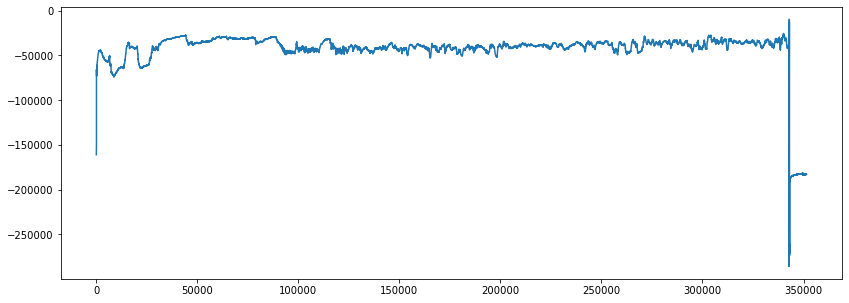

In [26]:
plt.figure(figsize=(14,5))
plt.plot(data['data']['band']['physiosignal']['ppg0']['signal'])
plt.show()

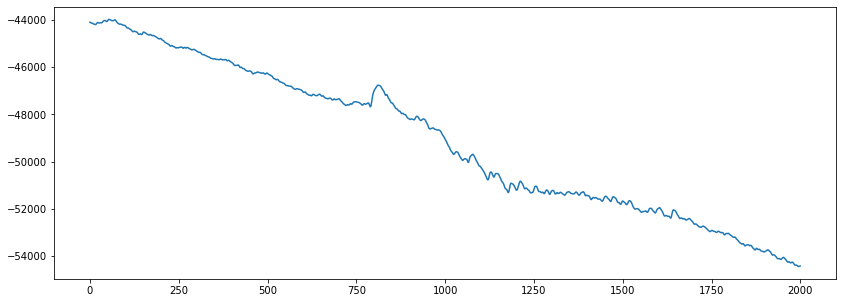

In [27]:
plt.figure(figsize=(14,5))
plt.plot(data['data']['band']['physiosignal']['ppg0']['signal'][2000:4000])
plt.show()

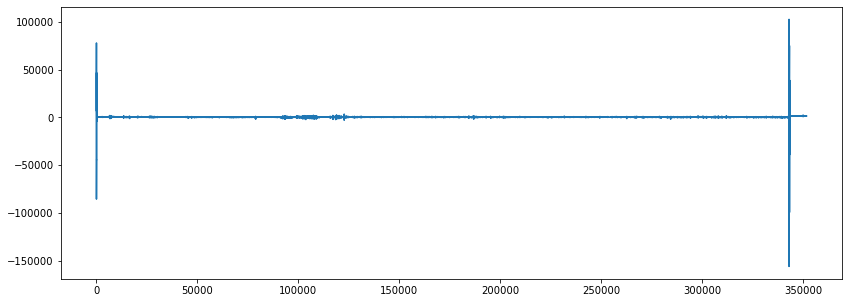

In [28]:
plt.figure(figsize=(14,5))
plt.plot(data['data']['band']['physiosignal']['ppg0']['visual']['signal'])
plt.show()

#### plt.figure(figsize=(14,5))
plt.plot(data['data']['band']['physiosignal']['ppg0']['visual']['signal'][2000:4000])
plt.show()

[27, 133, 463, 592, 670, 936, 1029, 1120, 1243, 1255, 1377, 1444, 1573, 1894, 2114, 2243, 2325, 2393, 2471, 2551, 2644, 2729, 2808, 2869, 2958, 3059, 3138, 3219, 3345, 3414, 3484, 3623, 3699, 3806, 3828]
peaks corrections: [27, 133, 463, 592, 670, 936, 1029, 1120, 1243, 1255, 1377, 1444, 1573, 1894, 2114, 2243, 2325, 2393, 2471, 2551, 2644, 2729, 2808, 2869, 2958, 3059, 3138, 3219, 3345, 3414, 3484, 3623, 3699, 3806, 3828]


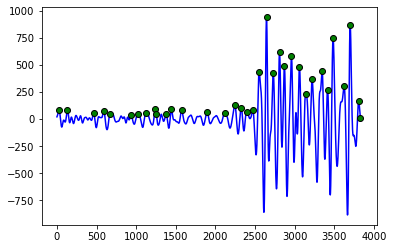

C:\Users\Guy\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


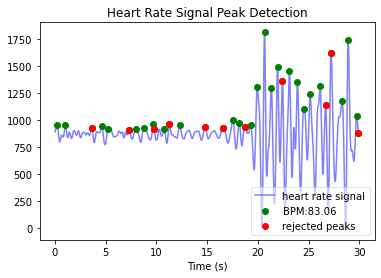

In [34]:
import heartpy as hp

#signal = data['data']['band']['physiosignal']['ppg0']['visual']['signal'][0:3840] #first 30 sec
signal = data['data']['band']['physiosignal']['ppg0']['visual']['signal'][3840:7680] # 2nd 30 sec
#ssignal = data['data']['band']['physiosignal']['ppg0']['visual']['signal'][7680:11520] #3rd 30 sec
filtered = hp.filter_signal(signal, [0.8, 3], sample_rate=128.0,
                            order=3, filtertype='bandpass')

wd_no_correction, m_no_correction = hp.process(filtered, sample_rate=128.0, clean_rr = True, windowsize=1)
print(wd_no_correction['peaklist'])
plt.plot(filtered, '-bD',marker="o", c="blue", mfc="green",  mec='k', markevery=wd_no_correction['peaklist'])
plt.show()

working_data_correction, measures_correction = hp.process(filtered,sample_rate=128.0, bpmmax=180, windowsize=1)
print(f"peaks corrections: {wd_no_correction['peaklist']}")

hp.plotter(working_data_correction, measures_correction)
#working_data, measures = hp.process_segmentwise(signal, sample_rate=128.0, segment_width = 40, segment_overlap = 0.25, calc_freq=True, reject_segmentwise=True, report_time=True)
#hp.segment_plotter(working_data, measures)


{'PPG_Peaks': array([ 133,  300,  370,  461,  590,  707,  888,  941, 1034, 1118, 1241,
        1311, 1378, 1438, 1572, 1899, 2006, 2243, 2330, 2383, 2550, 2647,
        2730, 2807, 2873, 2959, 3011, 3053, 3158, 3219, 3347, 3404, 3491,
        3627, 3693, 3807])}

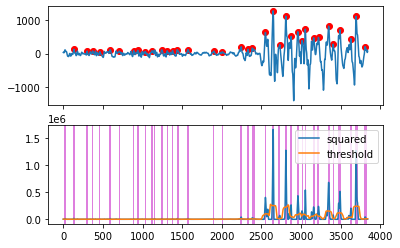

In [35]:
filtered_elegendi = hp.filter_signal(signal, [0.5, 8], sample_rate=128.0,
                            order=3, filtertype='bandpass')

elegendi_ppg_findpeaks(filtered_elegendi, 128.0, True)